In [11]:
import string
x = 'asw. wrr;q @we'
t = x.split()
for word in t:
    word.strip(string.whitespace + string.punctuation)
    print(word)

asw.
wrr;q
@we


In [45]:
import string

def read_words(x, hist):
    x = x.replace('-', ' ')
    t = x.split()
    for i in range(len(t)):
        t[i] = t[i].strip(string.whitespace + string.punctuation) #去除符號
        t[i] = t[i].lower() #小寫
        hist[t[i]] = hist.get(t[i], 0) + 1
    res = ''
    for letter in t:
        res = res + letter +'\n'
    return res

def splitting_file_as_words(file):
    hist = dict()
    fin = open(file)
    res = ''
    for line in fin:
        res = res + read_words(line, hist)
    fout = open('output_of_' + file, 'w')
    fout.write(res)
    fout.close()
    return hist

file = input('The name of the bookfile = ') + '.txt'

hist = splitting_file_as_words(file)

def sum_of_words(hist):
    return sum(hist.values())

def different_words(hist):
    return len(hist)

print('Total number of words: ', sum_of_words(hist))
print('Different number of words: ', different_words(hist))


The name of the bookfile = pg13249
Total number of words:  184624
Different number of words:  12852


In [46]:
t = splitting_file_as_words(file).items()
l = []
for key, value in t:
    l.append((value, key))
l.sort(reverse = True)
c = 0
for value, key in l:
    if c == 20:
        break
    else:
        print('There are ', value, '"', key, '"', 'in this book.')
        c += 1

There are  12923 " the " in this book.
There are  8487 " of " in this book.
There are  6233 " and " in this book.
There are  4231 " in " in this book.
There are  4012 " to " in this book.
There are  3344 " a " in this book.
There are  2600 " is " in this book.
There are  2438 " that " in this book.
There are  1858 " it " in this book.
There are  1736 " for " in this book.
There are  1536 " game " in this book.
There are  1408 " are " in this book.
There are  1272 " be " in this book.
There are  1252 " by " in this book.
There are  1179 " as " in this book.
There are  1012 " on " in this book.
There are  974 " birds " in this book.
There are  969 "  " in this book.
There are  918 " wild " in this book.
There are  892 " not " in this book.


In [4]:

hist2 = splitting_file_as_words('words.txt')
for word in hist:
    if word not in hist2:
        print(word)

gutenberg
etext
emma
austen
a
etexts
1971
1994
158
18
2002
emma10.txt
emma10.zip
emma11.txt
emma10a.txt
xxxxx10x.xxx
ftp
etc
2
december
31
2001
10,000
x
100,000,000=trillion
10
gutenberg/ibc
ibc
illinois
benedictine
p
o
2782
champaign
il
61825
email
michael
s
hart@vmd.cso.uiuc.edu
internet
hart@uiucvmd
bitnet
compuserve
attmail
mcimail

mrcnext.cso.uiuc.edu
login
your@login
cd
etext/etext91
etext92
etext93
etext/etext93
etext/articles
dir
mget
index100.gut
index200.gut
new.gut
newsletters
start**the
print!**for
etexts**start
what's
tm
30
project's
disclaimer
1
90
electronically
merchantability
disclaimers
3
hypertext
ascii
ebcdic
20
don't
60
ocr
charles
b
kramer
72600.2026@compuserve.com
tel
212
254
5093
end*the
etexts*ver.04.29.93*end
i
woodhouse
sister's
remembrance
taylor
mr
woodhouse's
taylor's
emma's
unperceived
weston
unexceptionable
morning's
unreserve
isabella's
mrs
valetudinarian
london
october
november
hartfield
christmas
isabella
highbury
woodhouses
daughter's
randalls
james

In [7]:
import random as random

def choose_from_hist(hist):
    col = []
    for key in hist:
        if hist[key] > 0:
            for i in range(hist[key]):
                col.append(key)
    return random.choice(col)
t = ['a', 'a', 'b']
hist = {'a':2, 'b':1}
x = 0
y = 0
for i in range(100000):
    if choose_from_hist(hist) =='a':
        x += 1
    else:
        y += 1
print('The probability of appearance of a = ', x / (x + y))
print('The probability of appearance of b = ', y / (x + y))

The probability of appearance of a =  0.66651
The probability of appearance of b =  0.33349


In [47]:
import random

def freq(hist):
    t = []
    sum = 0
    for key in hist:
        sum = sum + hist[key]
        t.append((sum, key))
    t.sort()
    return t

f = freq(hist) #the dictionary hist is defined above

def rank_of_freq_words(hist):
    z = []
    for key, value in hist.items():
        z.append((value, key))
    z.sort(reverse = True)
    rank = dict()
    k = 1
    for element in z:
        rank[element[1]] = k
        k += 1
    return rank


def round_up(value):
    n = int(value)
    if value > n:
        return n + 1
    else:
        return n

def in_bisect(t, value):
    l = len(t)
    if l == 1:
        return t[0][1]
    s = round_up(l / 2)
    if value < t[s-1][0]:
        return in_bisect(t[:s], value)
    else:
        return in_bisect(t[s:], value)
    
#choosing a word in a book randomly
def choose(f):
    sum = f[len(f) - 1][0]
    x = random.randint(1, sum)
    return in_bisect(f, x)

def counting(f, n, m):
    d = dict()
    for i in range(n):
        x = choose(f)
        d[x] = d.get(x, 0) + 1
    t = d.items()
    if len(t) < m:
        k = len(t)
        print('The number of different words which were choosed is less than m = ', m)
    else:
        k = m
    l = []
    for key, value in t:
        l.append((value, key))
    l.sort(reverse = True)
    for i in range(k):
        print(l[i], hist[l[i][1]] / 162742, rank[l[i][1]], sep = '\t') #the fixed number is the number of all words in "Emma"

n = int(input('Choose a word randomly n times, where n ='))
m = int(input('Show the first m top frequency words, where m = '))

rank = rank_of_freq_words(hist)

counting(f, n, m)

Choose a word randomly n times, where n =10000
Show the first m top frequency words, where m = 20
(707, 'the')	0.07940789716237971	1
(468, 'of')	0.05215002888006784	2
(335, 'and')	0.03829988570866771	3
(244, 'in')	0.025998205748976908	4
(220, 'to')	0.024652517481658084	5
(178, 'a')	0.020547861031571444	6
(137, 'is')	0.01597620773985818	7
(117, 'that')	0.014980767103759325	8
(108, 'it')	0.011416843838714039	9
(89, 'game')	0.009438251957085447	11
(78, 'for')	0.010667191013997615	10
(73, 'are')	0.008651730960661661	12
(70, 'by')	0.00769315849627017	14
(64, 'be')	0.007816052401961386	13
(61, 'as')	0.007244595740497229	15
(60, 'all')	0.005069373609762692	23
(58, '')	0.005954209730739453	18
(56, 'on')	0.006218431627975569	16
(55, 'birds')	0.0059849332071622565	17
(54, 'at')	0.0044610487765911686	27


n = 10000


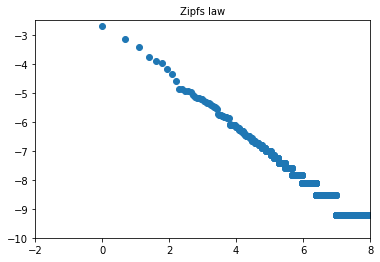

In [48]:
import matplotlib.pyplot as plt
import math

def randomly_choose(f, n):
    d = dict()
    for i in range(n):
        x = choose(f)
        d[x] = d.get(x, 0) + 1
    t = d.items()
    l = []
    for key, value in t:
        l.append((value, key))
    l.sort(reverse = True)
    return l

n = int(input('n = '))
l = randomly_choose(f, n)
#print(l)

x = []
y = []

for i in range(len(l)):
    #print(math.log(rank[l[i][1]]), math.log(l[i][0] / n))
    x.append(math.log(i + 1))
    y.append(math.log(l[i][0] / n))
plt.scatter(x, y)
plt.axis([-2, 8, -10, -2.5])
plt.title('Zipfs law', fontsize = 10)
plt.show()